이 코드들은 모두 "파이토치 딥러닝 프로그래밍"이라는 책의 8장 실습을 위한 코드임

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


## 8.4 활성화 함수와 ReLU 함수

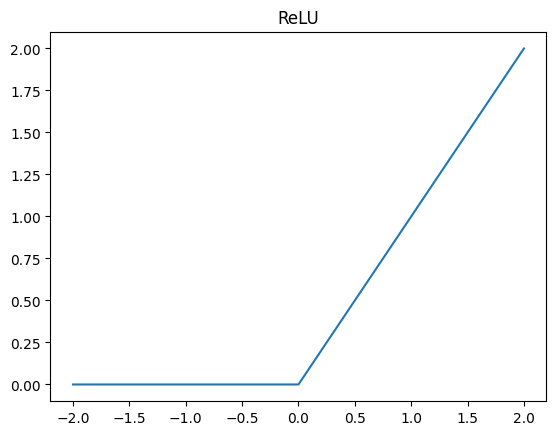

In [2]:
# ReLU graph

relu = nn.ReLU()
x_np = np.arange(-2,2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)
plt.plot(x.data, y.data)
plt.title('ReLU')
plt.show()

## 8.5 GPU 사용하기

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
# GPU using test
x_np = np.arange(-2.0,2.1, 0.25)
y_np = np.arange(-1.0,3.1,0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# calculation in cpu
z = x+y
print(z)

tensor([-3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,
         1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,  4.0000,  4.5000,
         5.0000])


In [5]:
x = x.to(device)

print('x:', x.device)
print('y:', y.device)

# 연산할려면 동일한 device에 있어야 한다. 
#z = x*y

x: cuda:0
y: cpu


In [6]:
y = y.to(device)
z = x*y
print(z)

# 모든 모델들은 .to(device)를 이용해 device로 보낼 수 있는 기능이 있어야 한다.

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.8 데이터 준비 1 (Dataset을 활용해 불러오기)

In [7]:
import torchvision.datasets as datasets

data_root = './data'

train_set0 = datasets.MNIST(
    root = data_root, # 데이터를 다운받을 경로
    train=True, # train dataset인지 test dataset인지
    download = True # 원본이 없는 경우, 다운로드 할지 안할지 여부
)

In [8]:
print("# of data: ", len(train_set0))

image, label = train_set0[0]

print('input data type: ', type(image))
print('label data type : ', type(label))

# of data:  60000
input data type:  <class 'PIL.Image.Image'>
label data type :  <class 'int'>


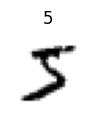

In [9]:
plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

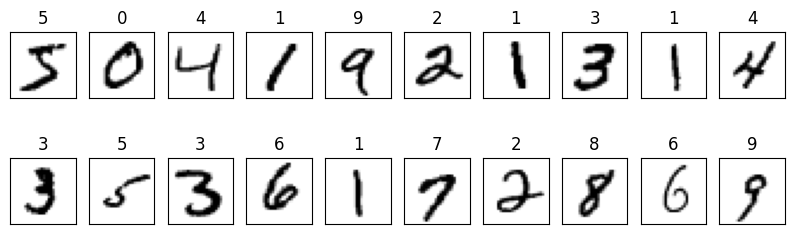

In [10]:
plt.figure(figsize=(10,3))
for i in range(20):
    ax = plt.subplot(2, 10, i+1)
    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8.9 데이터 준비 2 (Transform을 활용한 데이터 전처리)

1. 텐서 형식으로 변환하기

In [11]:
import torchvision.transforms as transforms

# 입력 데이터의 형식을 파이토치에서 사용할 수 있도록 텐서 형식으로 변환해준다.
transform1 = transforms.Compose([
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform1
)

In [12]:
image, label = train_set1[0]
print('input data type: ', type(image))
print('label data type : ', type(label))
print('min: ', image.data.min())
print('max: ', image.data.max())

input data type:  <class 'torch.Tensor'>
label data type :  <class 'int'>
min:  tensor(0.)
max:  tensor(1.)


2. 텐서 형식으로 변환하고, (-1,1) 범위를 가지도록 정규화하기

In [13]:
# 데이터를 (0,1) 범위에서 (-1,1)로 정규화한다.

transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
])

train_set2 = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform2
)

In [14]:
image, label = train_set2[0]
print('input data type: ', type(image))
print('label data type : ', type(label))
print('min: ', image.data.min())
print('max: ', image.data.max())

input data type:  <class 'torch.Tensor'>
label data type :  <class 'int'>
min:  tensor(-1.)
max:  tensor(1.)


3. 신경망에 넣기 위해 [1,28,28]에서 [784]로 데이터 형식 변환

In [15]:
transform3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform3
)

In [16]:
image, label = train_set3[0]
print('shape : ', image.shape)

shape :  torch.Size([784])


4. 최종 데이터셋 정의

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform
)

test_set = datasets.MNIST(
    root=data_root, train=False, download=True, transform=transform
)

## 8.10 데이터 준비 3(데이터로더를 활용한 미니 배치 데이터 생성)

In [18]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

test_loader = DataLoader(
    test_set, batch_size=batch_size, shuffle=False
)

In [19]:
print(len(train_loader))

for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


## 8.11 모델 정의

In [20]:
# 입력 차원수
n_input = image.shape[0]

# 출력 차원수
# 분류 클래스 수는 10
n_output = len(set(list(labels.data.numpy())))

# 은닉층의 노드 수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden:{n_hidden}  n_output: {n_output}')

n_input: 784  n_hidden:128  n_output: 10


In [21]:
# 모델 정의

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [22]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net(n_input, n_output, n_hidden)
net = net.to(device)

In [23]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


## 8.12 경사 하강법

In [24]:
import torch.optim as optim

torch.manual_seed(123)
torch.cuda.manual_seed(123)

lr = 0.01

net = Net(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 100

history = np.zeros((0,5))

In [25]:
from tqdm.notebook import tqdm

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # training
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)
        
        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)
        
        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()
    

    # inference
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)

        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]

        val_loss += loss_test.item()
        val_acc += (predicted_test == labels_test).sum().item()

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 8.13 결과 확인

In [ ]:
# 손실과 정확도 확인

print(f'init state : loss : {history[0,3]:.5f}  accuracy : {history[0,4]:.5f}')
print(f'final state : loss : {history[-1,3]:.5f}  accuracy : {history[-1,4]:.5f}')

IndexError: index 0 is out of bounds for axis 0 with size 0

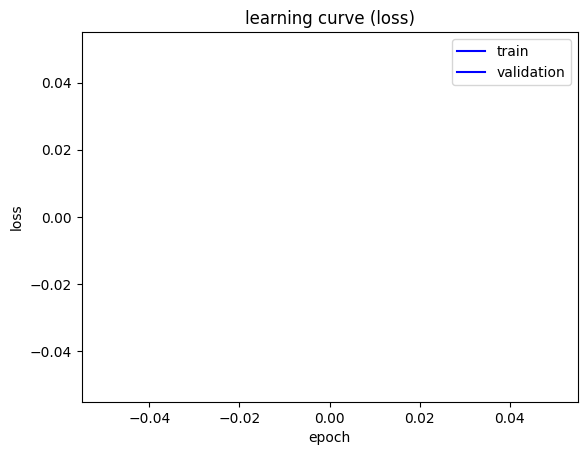

In [ ]:
# learning curve (loss)

plt.plot(history[:,0], history[:,1], 'b', label="train")
plt.plot(history[:,0], history[:,3], 'b', label="validation")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve (loss)')
plt.legend()
plt.show()

In [ ]:
# learning curve (accuracy)
plt.plot(history[:,0], history[:,2], 'b', label="train")
plt.plot(history[:,0], history[:,4], 'b', label="validation")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('learning curve (accuracy)')
plt.legend()
plt.show()